# Grouping

## The method groupby()

The group by method is used on categorical variables, groups the data into subsets according
to the different categories of that variable.
You can group by a single variable or you can group by multiple variables by passing in multiple variable names.


As an example, let’s say we are interested in finding the average annual spend and observe how they differ between different types of 'age_binned' and 'annual spend binned'

In [2]:
#Settings for the next examples
import pandas as pd
import matplotlib.pyplot as plt


#Loading the dataset example
file = '/content/drive/My Drive/Colab Notebooks/Data/df_purchases_profile.csv'
df_purchase = pd.read_csv(file)
df_purchase

,annual spend,age,distance_to_store_Km,onsite,online,age_binned,annual spend binned
0,1000,20,20,1,50,Young,high
1,1200,13,10,2,20,Young,high
2,150,35,100,5,30,Middle-age,low
3,400,60,3,20,1,Elderly,medium
4,80,40,5,5,4,Middle-age,low
5,500,42,1,15,5,Middle-age,medium
6,450,65,2,2,2,Elderly,medium
7,120,18,1,1,5,Young,low
8,950,15,30,5,25,Young,high


In [3]:
#Sort out just datas you want to handle
df_purchase_grouped = df_purchase[['age_binned', 'annual spend binned', 'annual spend']]

#Grouping by 'age_binned' and  'annual spend binned' returning the mean of 'annual spend' by using aggregating function mean()
df_purchase_grouped = df_purchase_grouped.groupby(['age_binned', 'annual spend binned'], as_index=False).mean()
df_purchase_grouped

,age_binned,annual spend binned,annual spend
0,Elderly,medium,425
1,Middle-age,low,115
2,Middle-age,medium,500
3,Young,high,1050
4,Young,low,120


## The method **pivot()**


A pivot table has one variable displayed along the columns and the other variable displayed along the rows.

See below that the 'annual spend' data becomes a **rectangular grid**, which is easier to visualize.

In [4]:
df_pivot = df_purchase_grouped.pivot(index='age_binned', columns='annual spend binned')

df_pivot

annual spend              
annual spend binned         high    low medium
age_binned                                    
Elderly                      NaN    NaN  425.0
Middle-age                   NaN  115.0  500.0
Young                     1050.0  120.0    NaN

## Heat map

Another way to represent the pivot table is using a heatmap plot.
Heat map takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.

It is a great way to plot the target variable over multiple variables and through this get visual clues of the relationship between these variables and the target.

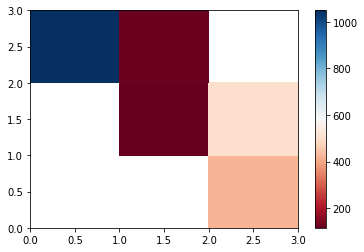

In [10]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()